AML HW3:
Alexa Muratyan (am2562)
Patrick Mazza (pmm259)

In [1]:
import numpy as np
import imageio
import scipy
import matplotlib.cm as cm
from matplotlib import pylab as plt
from matplotlib import pyplot as plt1
from scipy import misc
from sklearn.linear_model import LogisticRegression
import pandas as pd
from numpy.linalg import slogdet, det, solve
from scipy.stats import multivariate_normal as mvn
from scipy.special import logsumexp
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_digits
import seaborn as sns
%matplotlib inline

Question 1b: loading the training set into a matrix

(540, 2500) (540,)


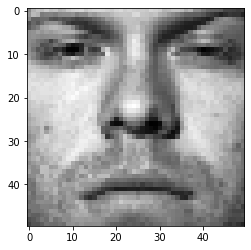

In [2]:
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = imageio.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print (train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

Question 1c: Computing the average face by summing average and train_data and then dividing by the total number of faces.

(540, 2500) (540,)


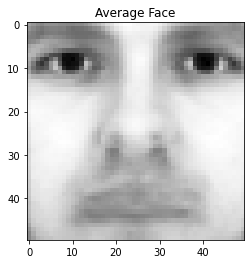

In [3]:
average_face = np.zeros((2500,), dtype = float)
for x in range(0, train_data.shape[0]):
    average_face = average_face + train_data[x, :]

average_face = average_face/train_data.shape[0]


print (train_data.shape, train_labels.shape)
plt.title('Average Face')
plt.imshow(average_face.reshape(50, 50), cmap = cm.Greys_r)
plt.show()


Question 1d: Computing mean subtracted data by subtracting mean_subtracted_data and subtracting the average_face

(540, 2500) (540,)


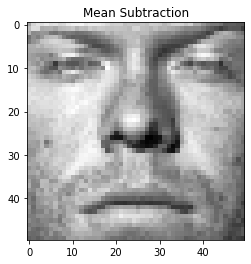

In [4]:
mean_subtracted_data = train_data
for x in range(0, train_data.shape[0]):
    mean_subtracted_data[x, :] = mean_subtracted_data[x, :] - average_face

print (train_data.shape, train_labels.shape)
plt.title('Mean Subtraction')
plt.imshow(mean_subtracted_data[10,:].reshape(50, 50), cmap = cm.Greys_r)

Question 1e: Plot the 10 Eigen Faces by calling mean subtracted data

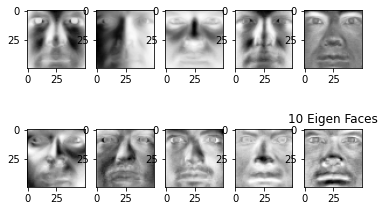

In [5]:
U, Sigma, Vt = np.linalg.svd(mean_subtracted_data)
plt.figure()
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    plt.imshow(Vt[i, :].reshape(50, 50), cmap = cm.Greys_r)
plt.title('10 Eigen Faces')
plt.show()

Question 1f: created a generate_feature_matrix function which takes in average_face and eigen_face to compute the r-dimensional feature matrix and accuracy of the test set.

In [6]:
def generate_feature_matrix(path, num, average_face, eigen_face):
    testing_labels, testing_data = [],[]

    with open(path) as f:
        for line in f:
            im = imageio.imread(line.strip().split()[0])
            testing_data.append(im.reshape(2500,))
            testing_labels.append(line.strip().split()[1])
    
    testing_data, testing_labels = np.array(testing_data, dtype=float), np.array(testing_labels, dtype=int)

    mean_subtracted_data = testing_data
    for x in range(0, testing_data.shape[0]):
        mean_subtracted_data[x, :] = mean_subtracted_data[x, :] - average_face
    
    r=num
    F_feature_matrix_test = mean_subtracted_data.dot(np.transpose(eigen_face[:r,:]))
    return(F_feature_matrix_test, testing_labels)


In [7]:
r=10
print('r = '+str(r))
F_feature_matrix_train = mean_subtracted_data.dot(np.transpose(Vt[:r,:]))
F_feature_matrix_test, test_labels = generate_feature_matrix('./faces/test.txt', r, average_face, Vt)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(F_feature_matrix_train, train_labels)

test_acc = logistic_regression_model.score(F_feature_matrix_test, test_labels)
print('Testing Accuracy : '+str(test_acc*100)+' %')

r = 10
Testing Accuracy : 76.0 %


/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Question 1g: imported scikit learn to perform logistic regression.

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexamuratyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

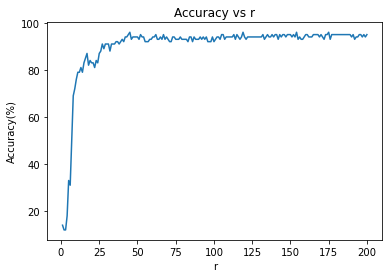

In [8]:
Accuracy = np.zeros(200)
for r in range(1,201):
    F_feature_matrix_test, test_labels = generate_feature_matrix('./faces/test.txt', r, average_face, Vt)
    F_feature_matrix_train = mean_subtracted_data.dot(np.transpose(Vt[:r, :]))
    logistic_regression_model.fit(F_feature_matrix_train, train_labels)
    Accuracy[r-1] = logistic_regression_model.score(F_feature_matrix_test, test_labels)*100


plt1.figure()
plt1.title('Accuracy vs r')
plt1.xlabel('r')
plt1.ylabel('Accuracy(%)')
plt1.plot(np.linspace(1,200,200),Accuracy)
plt1.show()

Question 2a: Parsed and plotted the old_faithfull geyser set

In [9]:
chart = pd.read_fwf("/Users/alexamuratyan/Documents/Cornell Tech Classes/Fall 2022/AML/faces/old_faithfull", names = ["ID", "Eruptions", "Waiting"], skiprows = 1)
print(chart)

      ID  Eruptions  Waiting
0      1      3.600       79
1      2      1.800       54
2      3      3.333       74
3      4      2.283       62
4      5      4.533       85
..   ...        ...      ...
267  268      4.117       81
268  269      2.150       46
269  270      4.417       90
270  271      1.817       46
271  272      4.467       74

[272 rows x 3 columns]


(272, 3)


<AxesSubplot:xlabel='Eruptions', ylabel='Waiting'>

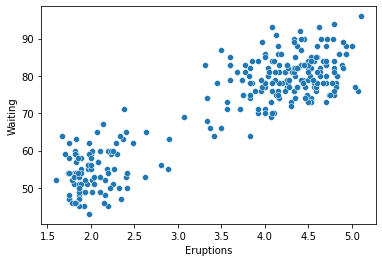

In [10]:
print(chart.shape)
sns.scatterplot(x="Eruptions", y="Waiting", data=chart)

Question 2b: E-step derivation

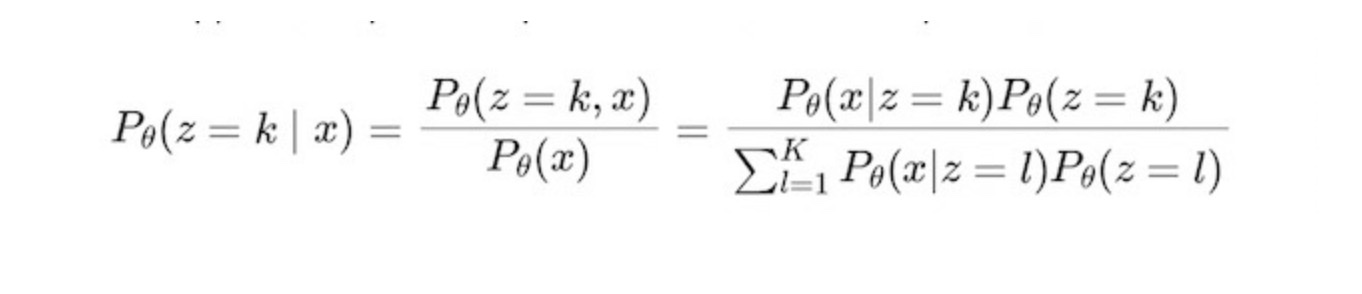

Question 2c: M-step derivation

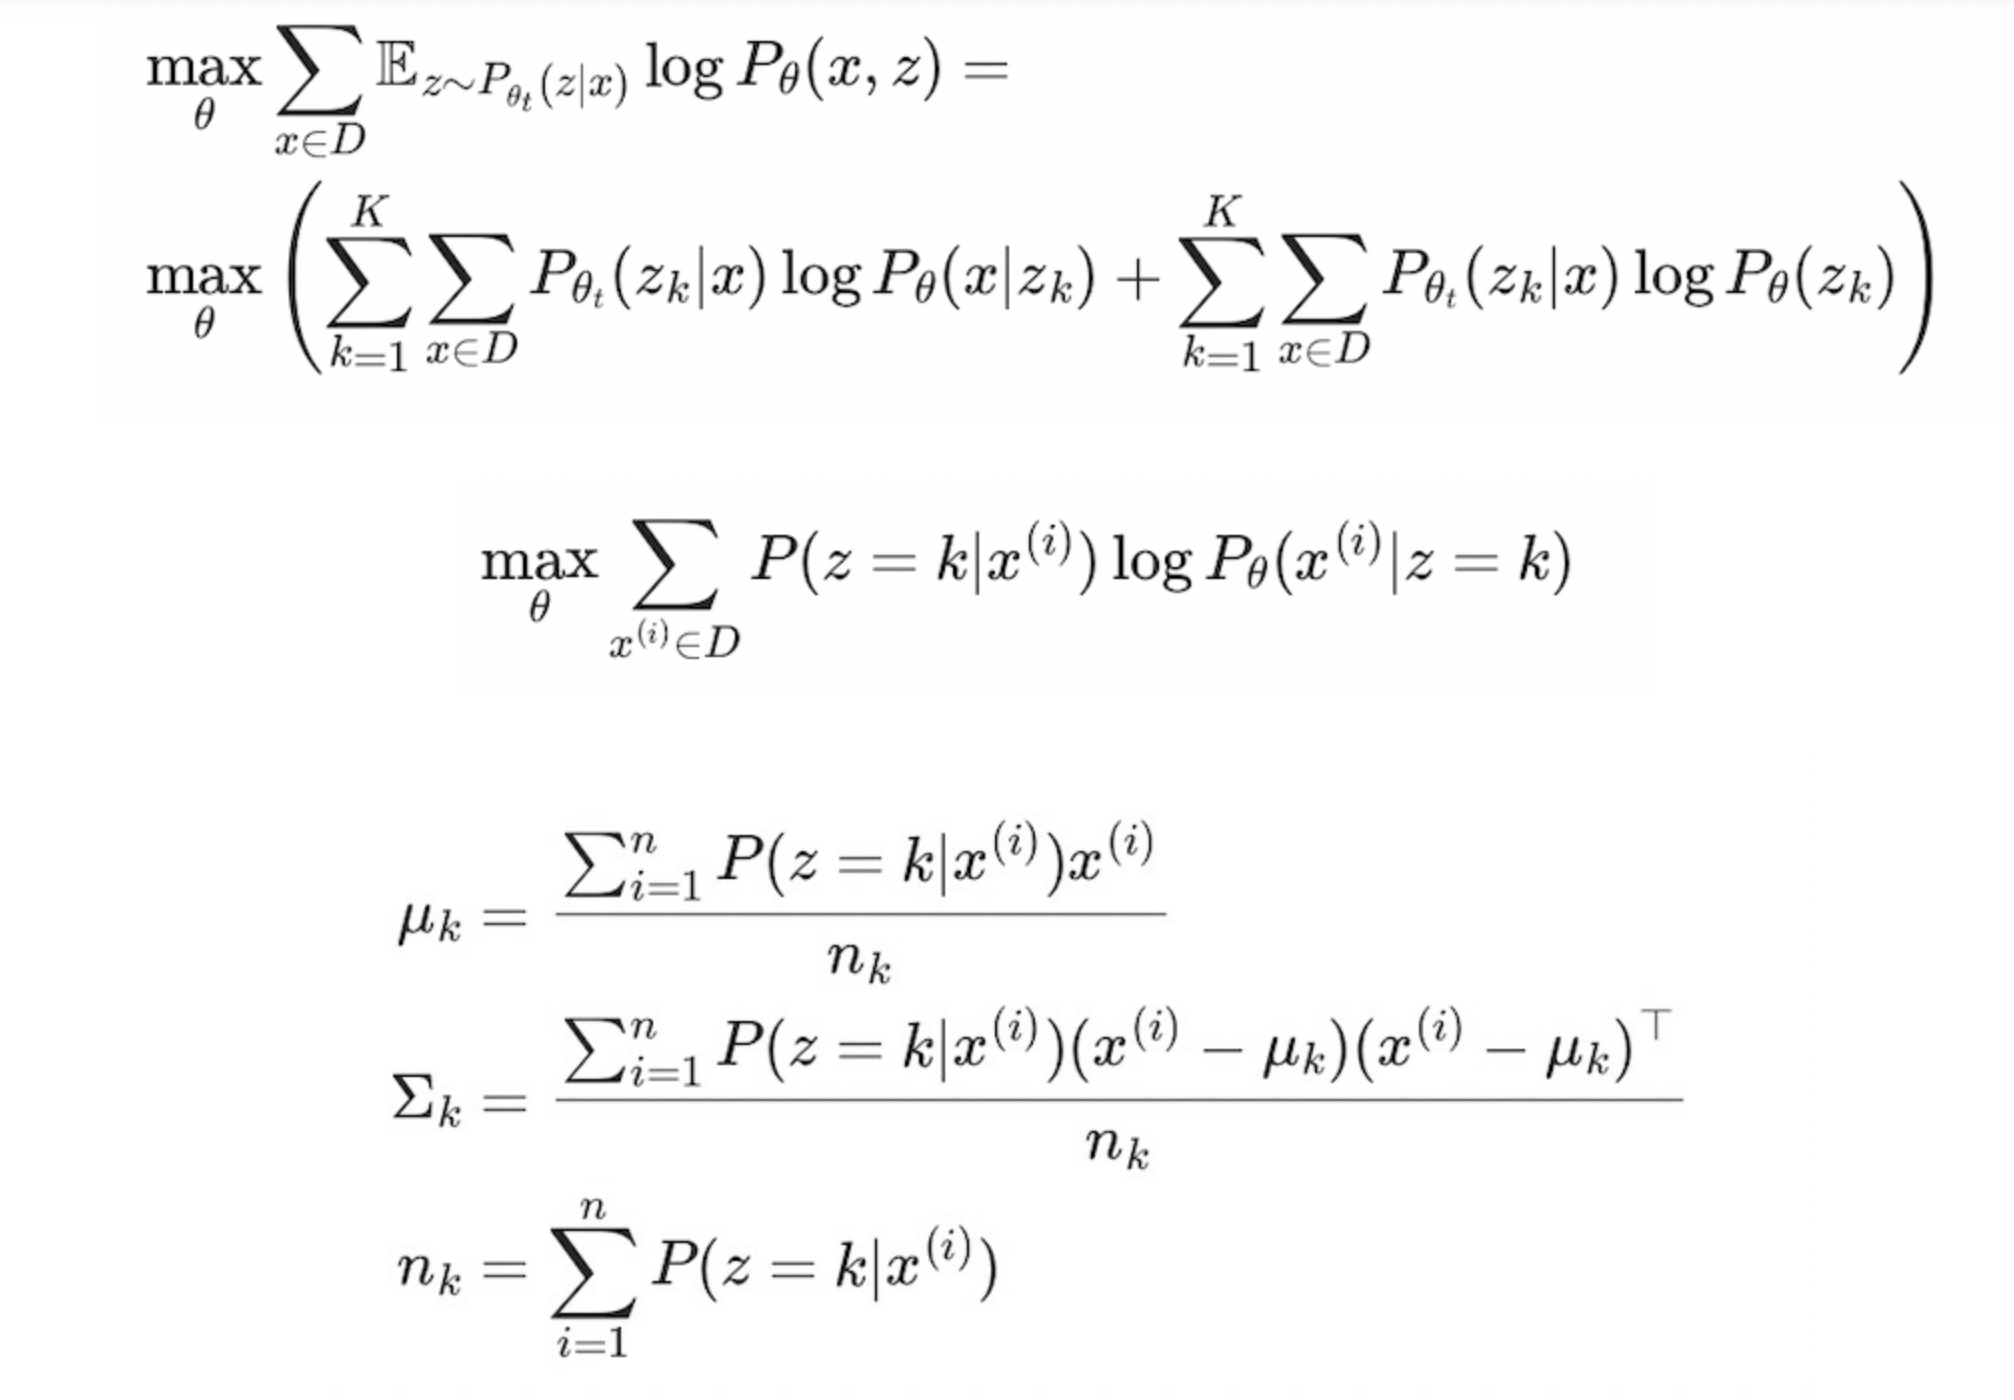

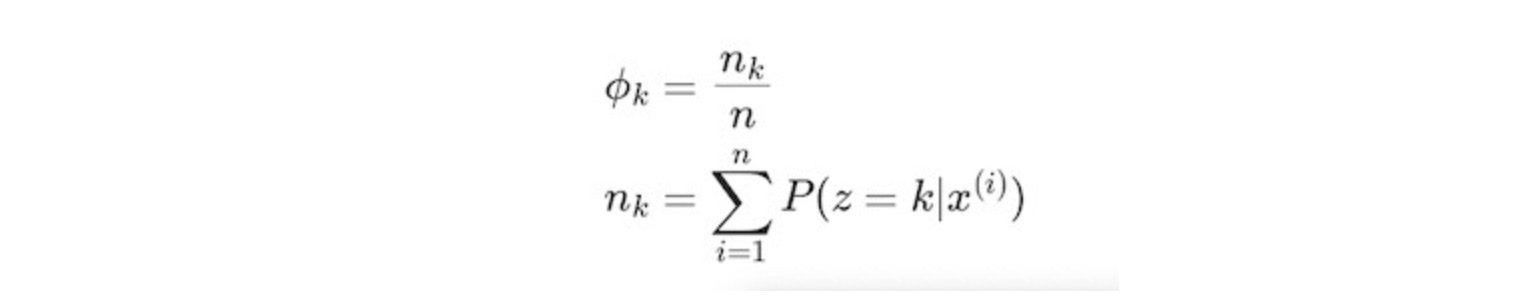

Question 2d: 
E step- For the E step, we estimate the parameters of the weight, compute the probability in accordance with the parameters and then hallucinate the expected cluster assignments to get the best accuracy out of the clustering algorithm.

M step- For the M step, we find new parameters to maximize the marginal log liklihood by optimizing the probability for the model.

We set termination criterion to false in order to prevent the model from converging to local optimum points. This will allow us to choose the best model and allow us to computationally iterate and achieve the maximum marginal log likelyhood. 


In [11]:
chart = pd.read_fwf("/Users/alexamuratyan/Documents/Cornell Tech Classes/Fall 2022/AML/faces/old_faithfull", names = ["ID", "Eruptions", "Waiting"], skiprows = 1)
chart2 = chart[["Eruptions", "Waiting"]].values

In [12]:
np.random.seed(5)
def init_params(X,k):
    (n,d) = X.shape
    
    mu = X[np.random.choice(n, size = k, replace = False), :]
    sig = np.zeros(shape = (k,d,d))
    phi = np.ones(shape=(k)) / k
    
    for i in range(d):
        sig[:, i, i] = np.var(X[:,i]) / 10
        
    return k, mu, sig, phi,

In [13]:
def e_step(X, k, mu, sig, phi):
    y= np.zeros(shape=(X.shape[0], sig.shape[0]))
    for i in range(k):
        y[:,i] = mvn.pdf(X, mu[i], sig[i]) * phi[i]
        
    return y / np.linalg.norm(y, axis = 1, ord = 1, keepdims = True)

In [14]:
def m_step(X, y, k):
    (n, d) = X.shape
    k = y.shape[1]
    
    mu = np.zeros(shape = (k,d))
    sig = np.zeros(shape= (k,d,d))
    phi = np.sum(y, axis = 0) / np.sum(y)
    for i in range(k):
        mu[i,:] = np.sum(y[:, i].reshape(-1,1) * X, axis = 0) / np.sum(y[:, i])
        sig[i, :, :] = np.sum(y[:,i].reshape(-1,1,1) * ((X-mu[i, :]).reshape(n, X.shape[1], 1)@(X-mu[i,:]).reshape(n,1,X.shape[1])), axis = 0) / np.sum(y[:, i])
    return mu, sig, phi

(2, 2) (2, 2, 2) (2,)


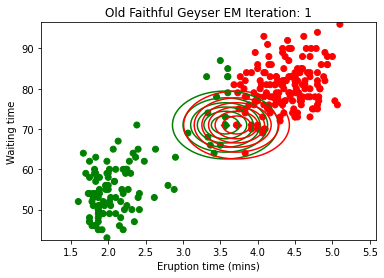

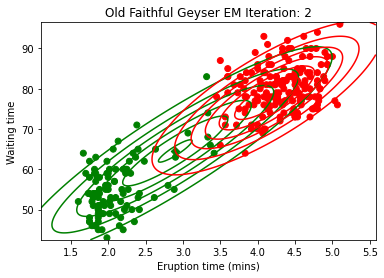

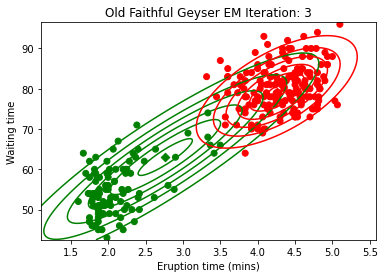

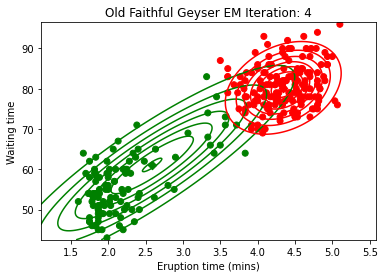

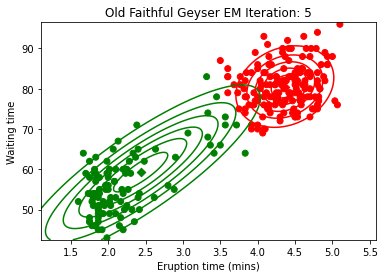

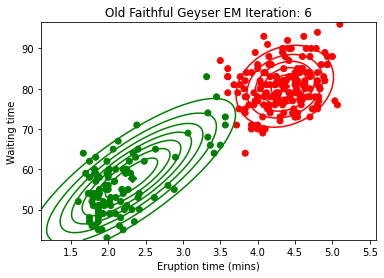

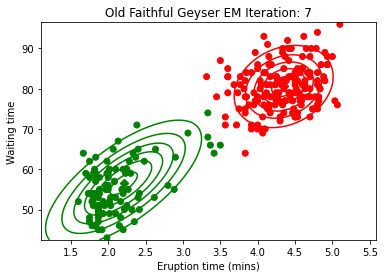

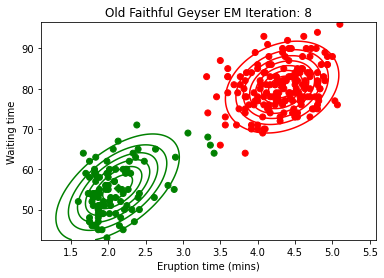

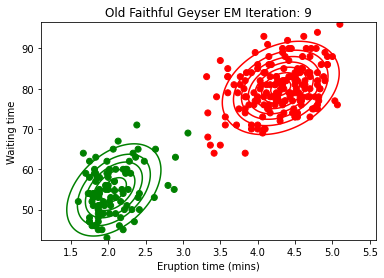

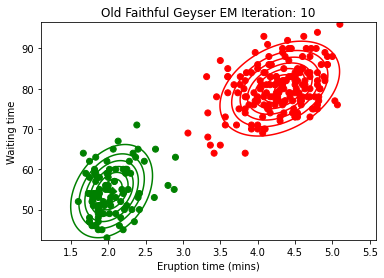

In [15]:
def em_alg(X):
    termination_criterion = False
    K, mu, sig, phi= init_params(X, 2)
    print(mu.shape, sig.shape, phi.shape)
    
    for i in range(10):
        y = e_step(X, K, mu, sig, phi)
        
        c=['green', 'red']
        
        plt.scatter(X[:,0], X[:,1], c=[c[1] if y[j,1] > y[j,0] else c[0] for j in range(y.shape[0])])
        plt.title(f'Old Faithful Geyser EM Iteration: {i+1}')
        plt.xlabel("Eruption time (mins)")
        plt.ylabel("Waiting time")
        
        for i in range(K):
            xx, yy = np.meshgrid(
                np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, .02),
                np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, .02)
            )
            
            plt.contour(
                xx,
                yy,
                mvn.pdf(
                    np.column_stack([xx.flat,yy.flat]),
                    mu[i],
                    sig[i]
                ).reshape(xx.shape),
                colors=c[i]
            )
            plt.scatter(mu[i,0], mu[i,1], marker='D', c=c[i])
        plt.show()
        
        mu, sig, phi = m_step(X, y, K)
        
em_alg(chart2)
                

2e:
The dichotomy between an EM and K-means ML algorithm are similar, They both are methods that continuously refine their models through an iterive process. Their difference lies in how they calculate their models. K-means algorithms calculate the Eucliadian distance in conjunction with calculating te distance between two datapoints. EM algorithms use statistical methods. I believe we will get different clusters and EM will yield better results. This is becasue the clusters in EM aren't limited to sperical shapes and have more freedom because they can provide different covariance matrices. This freedom is useful when dealing with this particular dataset.